Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. Tree models where the target variable can take a discrete set of values are called classification trees.

In [204]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [205]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [206]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [207]:
df.columns[df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [208]:
target = df['Embarked']   ######  has null values
inputs = df.drop(["Cabin","Name","Ticket","Embarked"],axis='columns',inplace=True)
target,df

(0      S
 1      C
 2      S
 3      S
 4      S
       ..
 886    S
 887    S
 888    S
 889    C
 890    Q
 Name: Embarked, Length: 891, dtype: object,
      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
 0              1         0       3    male  22.0      1      0   7.2500
 1              2         1       1  female  38.0      1      0  71.2833
 2              3         1       3  female  26.0      0      0   7.9250
 3              4         1       1  female  35.0      1      0  53.1000
 4              5         0       3    male  35.0      0      0   8.0500
 ..           ...       ...     ...     ...   ...    ...    ...      ...
 886          887         0       2    male  27.0      0      0  13.0000
 887          888         1       1  female  19.0      0      0  30.0000
 888          889         0       3  female   NaN      1      2  23.4500
 889          890         1       1    male  26.0      0      0  30.0000
 890          891         0       3    mal

[Text(0.5, 1.0, 'HEAT MAP REPRESENTATION OF NULL VALUES')]

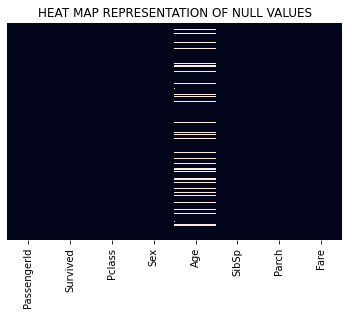

In [209]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False).set(title='HEAT MAP REPRESENTATION OF NULL VALUES')

In [210]:
df.columns[df.isnull().any()]

#y_train.fillna(value=y_train.mode[0], inplace=True)


Index(['Age'], dtype='object')

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,
                                                    test_size=0.20)



C:\Users\ANTHONY\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


[Text(0.5, 1.0, 'HEAT MAP REPRESENTATION ')]

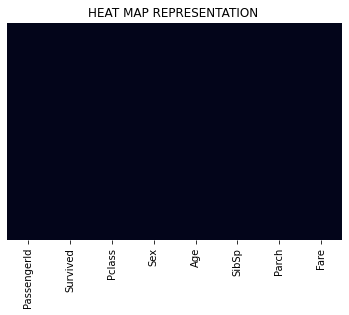

In [212]:
import numpy as np
######33  IMPUTING BOTH TEST AND TRAIN WITH MEAN OF TRAIN

X_test["Age"].fillna(value=X_train["Age"].mean(), inplace=True)

X_train["Age"].fillna(value=X_train["Age"].mean(), inplace=True)

y_test=y_test.fillna(value=y_train.mode()[0])
y_train=y_train.fillna(value=y_train.mode()[0])

# will replace  Nan value in dataframe with value -99  
#df.Embarked=df.Embarked.replace(to_replace = np.nan, value = y_train.mode) 

#df.fillna()

sns.heatmap(X_test.isnull(),yticklabels=False,cbar=False).set(title='HEAT MAP REPRESENTATION ')

In [213]:
y_train.shape,y_test.shape

((712,), (179,))

In [193]:
#X_train.shape,X_test.shape
#y_train=y_train.fillna("S")
#data["Gender"].fillna("No Gender", inplace = True)

In [214]:
y_train[y_train.isnull()]

Series([], Name: Embarked, dtype: object)

In [215]:
### ONE HOT ENCODING

Big2=pd.concat([X_train, X_test], sort=False)


Big2= pd.get_dummies(Big2)
Big2


XX=Big2[0:712]
ZZ=Big2[712:]
XX.shape,ZZ.shape

((712, 9), (179, 9))

In [216]:
XX.columns[XX.isnull().any()]

Index([], dtype='object')

In [217]:
y_train.value_counts()

S    514
C    139
Q     59
Name: Embarked, dtype: int64

In [220]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

clf=model.fit(XX, y_train)
model.score(ZZ,y_test)

0.7653631284916201

In [221]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- feature_6 <= 27.14
|   |   |--- class: S
|   |--- feature_6 >  27.14
|   |   |--- feature_6 <= 31.66
|   |   |   |--- feature_0 <= 240.50
|   |   |   |   |--- class: C
|   |   |   |--- feature_0 >  240.50
|   |   |   |   |--- feature_0 <= 272.50
|   |   |   |   |   |--- class: S
|   |   |   |   |--- feature_0 >  272.50
|   |   |   |   |   |--- feature_3 <= 41.25
|   |   |   |   |   |   |--- feature_0 <= 687.00
|   |   |   |   |   |   |   |--- class: C
|   |   |   |   |   |   |--- feature_0 >  687.00
|   |   |   |   |   |   |   |--- feature_0 <= 767.50
|   |   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |   |   |--- feature_0 >  767.50
|   |   |   |   |   |   |   |   |--- class: C
|   |   |   |   |   |--- feature_3 >  41.25
|   |   |   |   |   |   |--- feature_3 <= 51.75
|   |   |   |   |   |   |   |--- class: S
|   |   |   |   |   |   |--- feature_3 >  51.75
|   |   |   |   |   |   |   |--- class: C
|   |   |--- feature_6 >  31.66
|   |   |

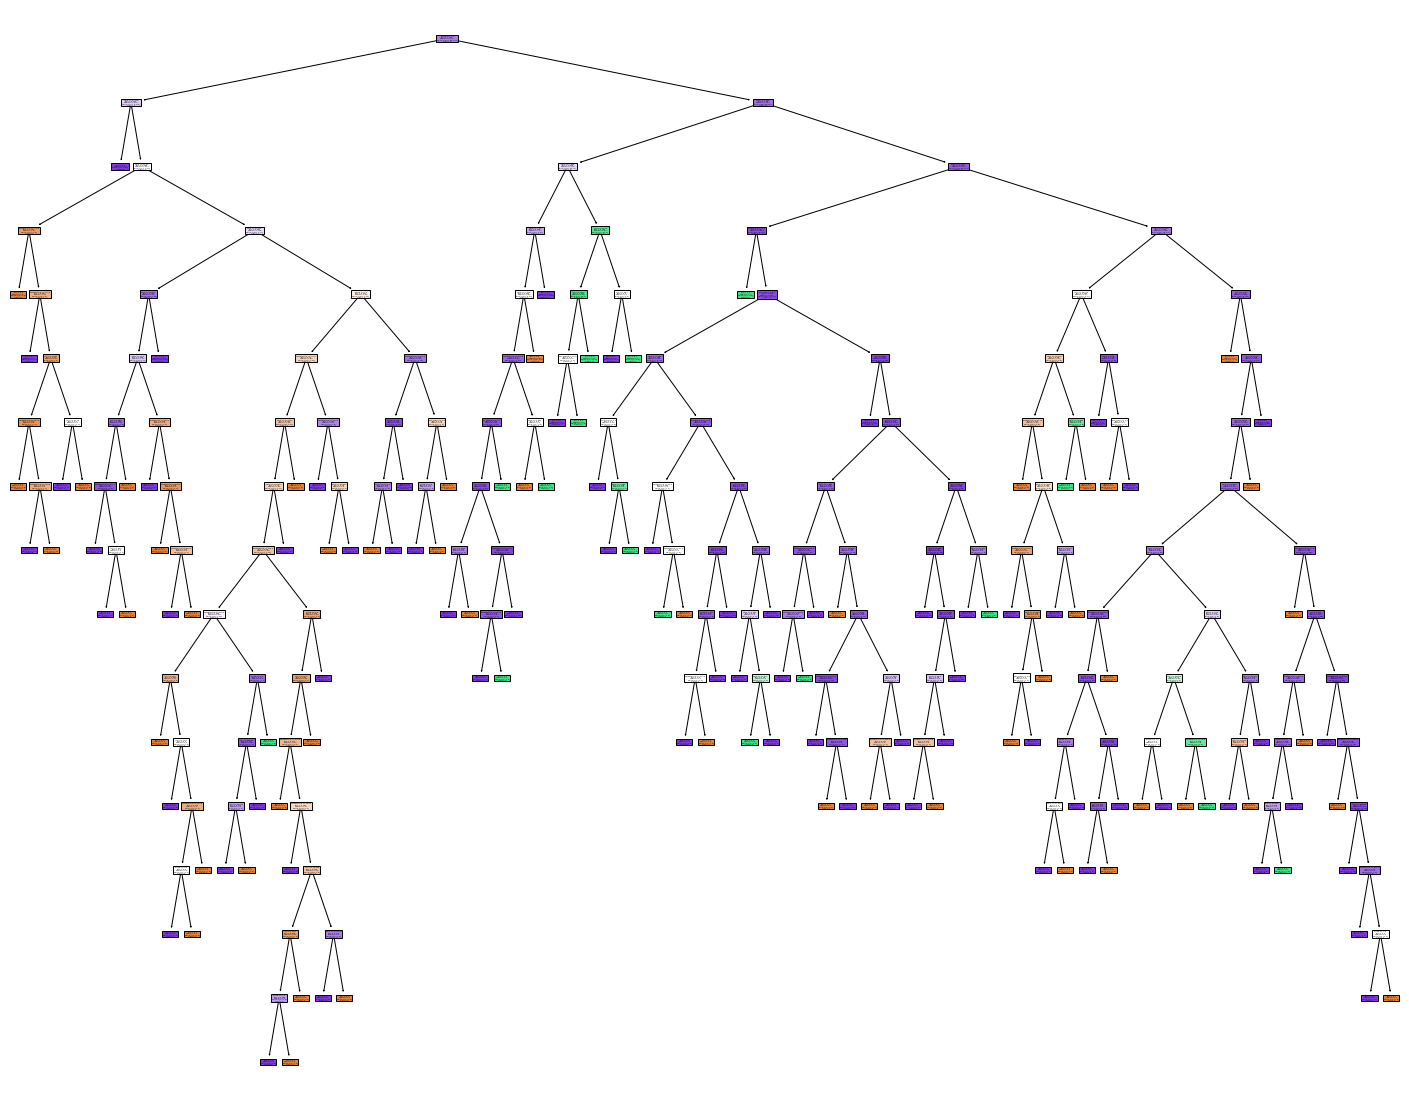

In [234]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=XX.columns,  
                   class_names=target,
                   filled=True)

In [229]:
https://mljar.com/blog/visualize-decision-tree/

SyntaxError: invalid syntax (<ipython-input-229-1c4ddd2b61f2>, line 1)